<a href="https://www.kaggle.com/code/alnourabdalrahman9/bank-customers-segmentation?scriptVersionId=181812017" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#  Overview
This project aims to segment bank customers based on their behavior and attributes using clustering techniques. By identifying distinct customer groups, the bank can tailor its services and marketing strategies more effectively.

# Methodology
**K-means Clustering**
The K-means algorithm partitions customers into 'k' clusters based on feature similarity. It minimizes the within-cluster sum of squares to assign data points to the nearest cluster centroid.

**Hierarchical Clustering**
Hierarchical Clustering builds a hierarchy of clusters by merging or splitting them based on distance metrics. It can create a dendrogram to visualize the clustering structure at various levels.

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



# LOAD THE DATA

In [2]:
creditcard_df = pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')


*  CUSTID: Identification of Credit Card holder
*  BALANCE: Balance amount left in customer's account to make purchases
*  BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
*  PURCHASES: Amount of purchases made from account
*  ONEOFFPURCHASES: Maximum purchase amount done in one-go
*  INSTALLMENTS_PURCHASES: Amount of purchase done in installment
*  CASH_ADVANCE: Cash in advance given by the user
*  PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
*  ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
*  PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
*  CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
*  CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
*  PURCHASES_TRX: Number of purchase transactions made
*  CREDIT_LIMIT: Limit of Credit Card for user
*  PAYMENTS: Amount of Payment done by user
*  MINIMUM_PAYMENTS: Minimum amount of payments made by user
*  PRC_FULL_PAYMENT: Percent of full payment paid by user
*  TENURE: Tenure of credit card service for user

In [3]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Exploratory Data Analysis (EDA)

In [4]:
# Let's see if we have any missing data
creditcard_df.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
creditcard_df['MINIMUM_PAYMENTS'].fillna(creditcard_df['MINIMUM_PAYMENTS'].median(),inplace=True)

In [6]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
creditcard_df['CREDIT_LIMIT'].fillna(creditcard_df['CREDIT_LIMIT'].mean(),inplace=True)

In [8]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [10]:
creditcard_df.drop('CUST_ID', axis=1, inplace=True)

In [11]:
n = len(creditcard_df.columns)
n

17

/tmp/ipykernel_19/3487302241.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
/tmp/ipykernel_19/3487302241.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[credi

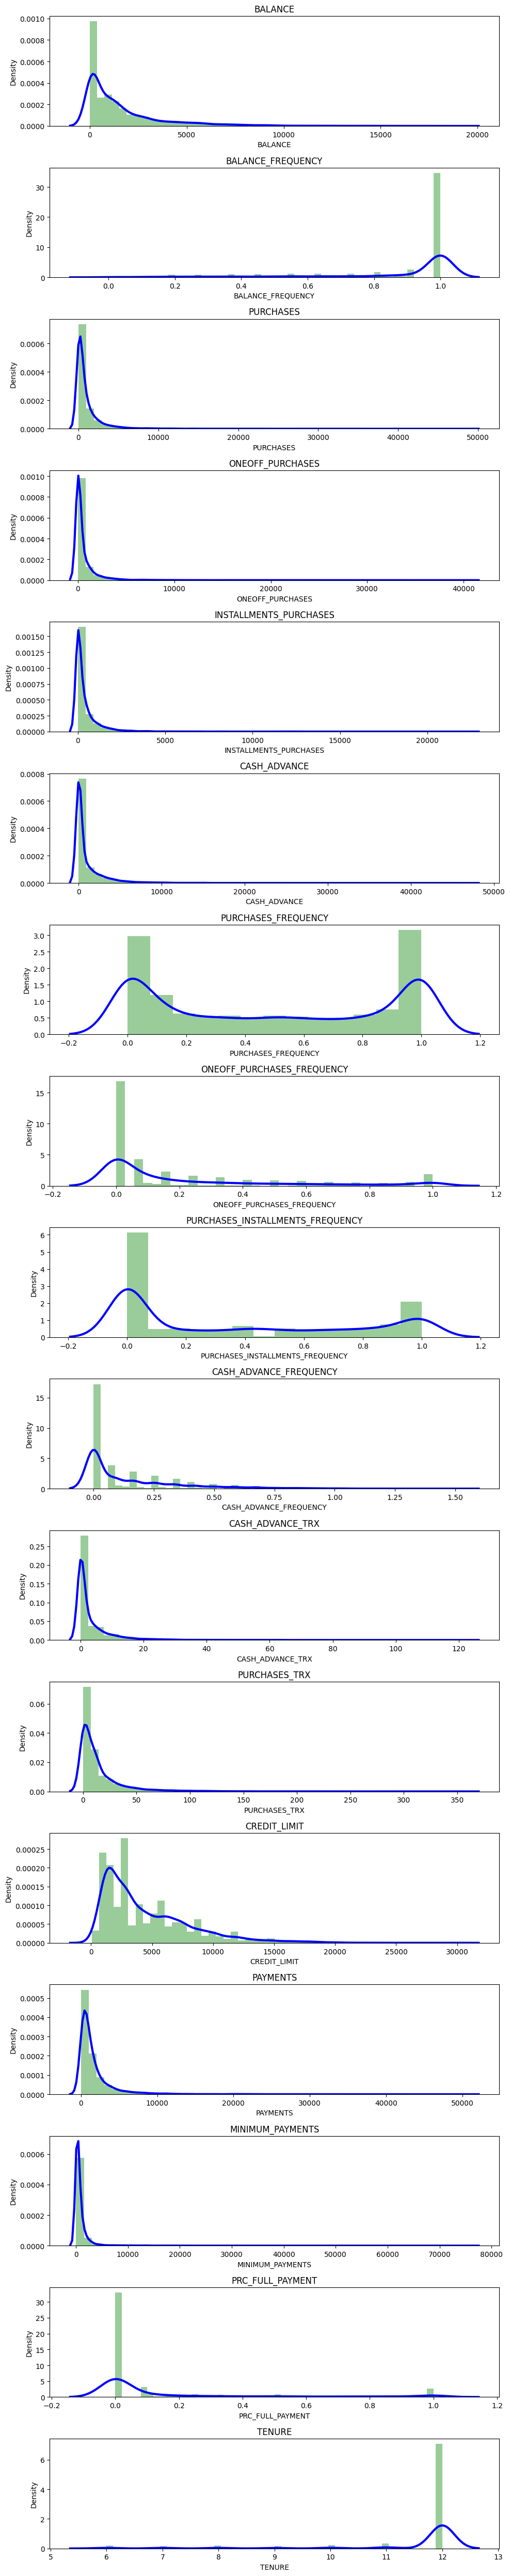

In [12]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

In [13]:
corr_matrix=creditcard_df.corr()

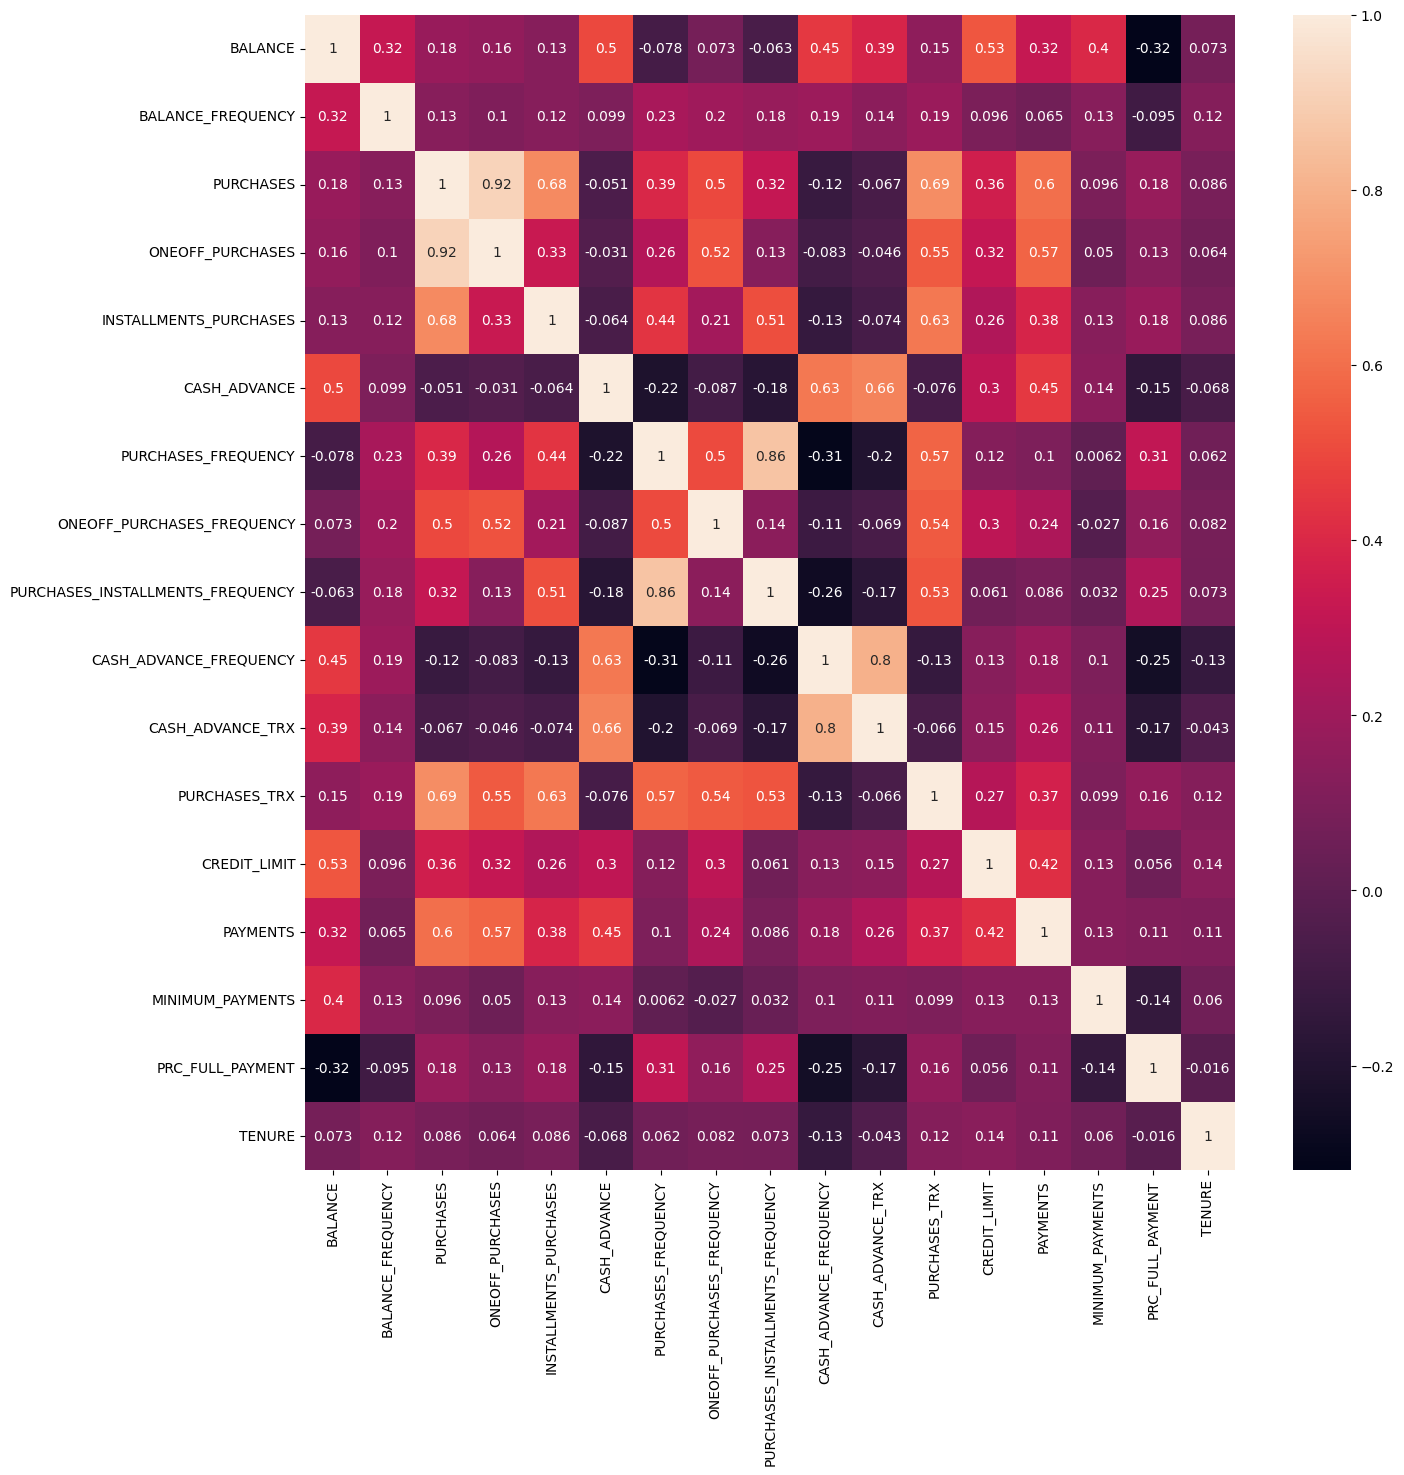

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()


**We have some highly correlated features, we'll drop them as they have redundant information**

In [15]:
creditcard_df.drop('ONEOFF_PURCHASES', axis=1, inplace=True)
creditcard_df.drop('PURCHASES_INSTALLMENTS_FREQUENCY', axis=1, inplace=True)

In [16]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

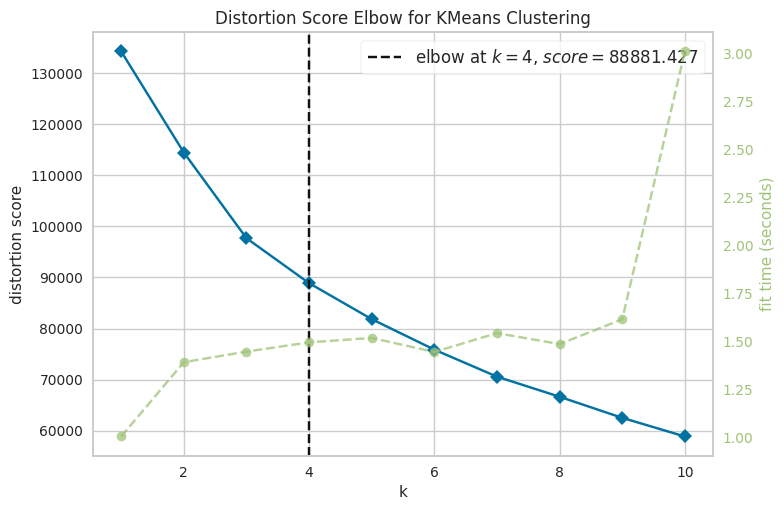

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Instantiate the KMeans model
kmeans = KMeans()

# Instantiate the KElbowVisualizer with the KMeans model and the range of clusters to explore
visualizer = KElbowVisualizer(kmeans, k=(1, 11))

# Fit the data to the visualizer
visualizer.fit(creditcard_df_scaled)

# Finalize and render the figure
visualizer.show()

So 4 clusters is the best choice for our model

In [18]:
creditcard_df_scaled.shape

(8950, 15)

In [19]:
kmeans = KMeans(4)
labels=kmeans.fit_predict(creditcard_df_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
data = kmeans.cluster_centers_

In [21]:
cluster_centers = pd.DataFrame(data, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.409577,0.389279,-0.226063,-0.237016,1.610542,-0.472950,-0.218238,1.688302,1.537668,-0.272429,0.796776,0.581943,0.506280,-0.404040,-0.079824
1,-0.301675,-0.418155,-0.352431,-0.356287,-0.199783,-0.682076,-0.460821,-0.125569,-0.179185,-0.458628,-0.382961,-0.286205,-0.128308,-0.258588,-0.115999
2,1.174606,0.460706,3.483717,3.064071,-0.122988,1.161793,1.694708,-0.291403,-0.149802,3.490315,1.546263,2.202739,0.696739,0.396189,0.329242
3,-0.293523,0.340920,0.212726,0.262781,-0.381953,0.965951,0.523494,-0.493663,-0.376559,0.368919,0.024814,-0.077273,-0.106082,0.461682,0.151293


**In order to understand what these numbers mean, let's perform inverse transformation**

In [22]:

cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4498.389478,0.969487,520.217909,196.736582,4356.252389,0.300533,0.137353,0.472991,13.742284,7.938272,7393.444865,3417.812912,2025.886104,0.035540,11.410494
1,936.563584,0.778214,250.231506,88.881836,559.915906,0.216601,0.064986,0.110017,2.026018,3.310046,3101.080865,904.609026,545.607609,0.078082,11.362081
2,4009.317469,0.986408,8446.220356,3181.869288,720.958776,0.956634,0.708022,0.076831,2.226537,101.466019,10120.388350,8109.856094,2470.163244,0.269593,11.957929
3,953.532376,0.958031,1457.698115,648.697151,177.897987,0.878033,0.358626,0.036357,0.679086,23.879775,4584.731172,1509.447195,597.454459,0.288749,11.719787


In [23]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,95.4,0.000000,0.166667,0.000000,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


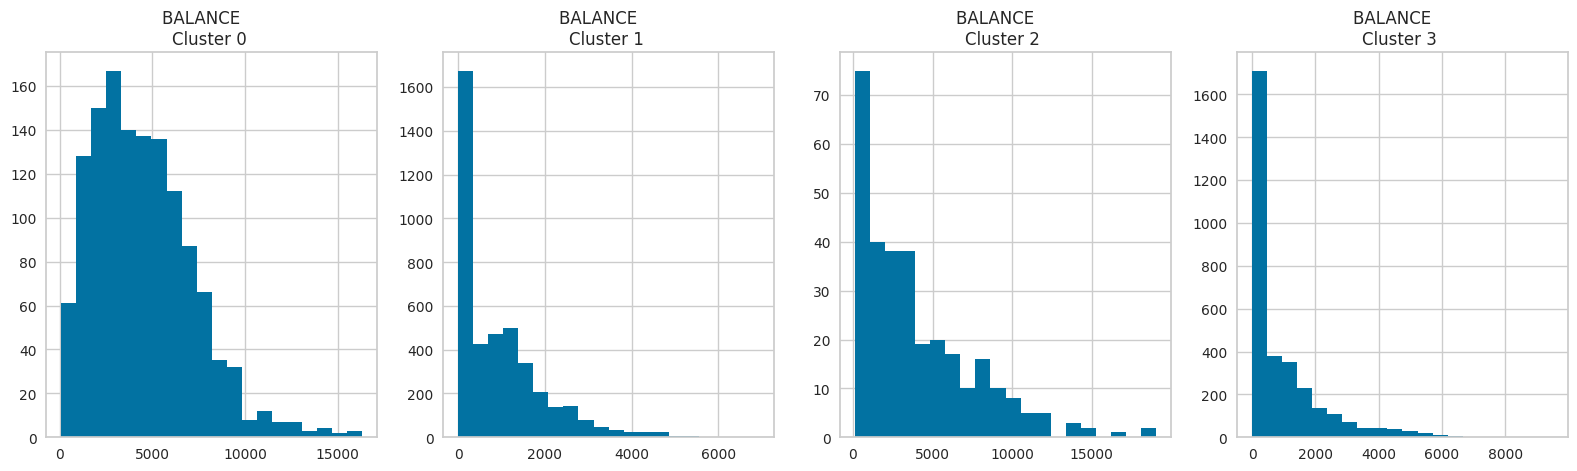

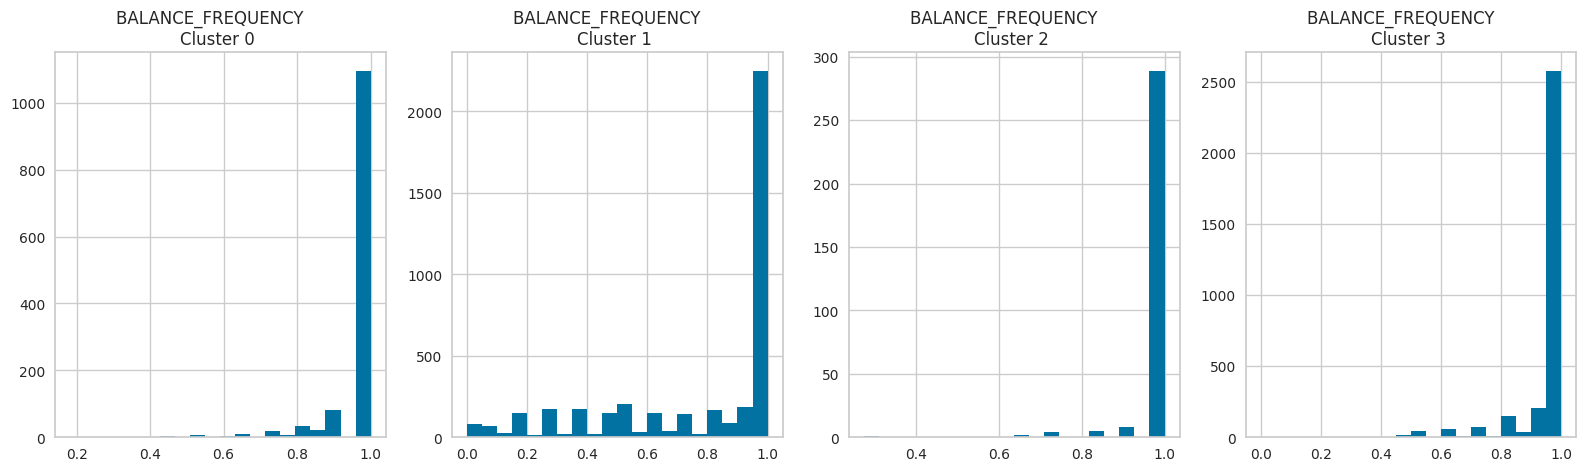

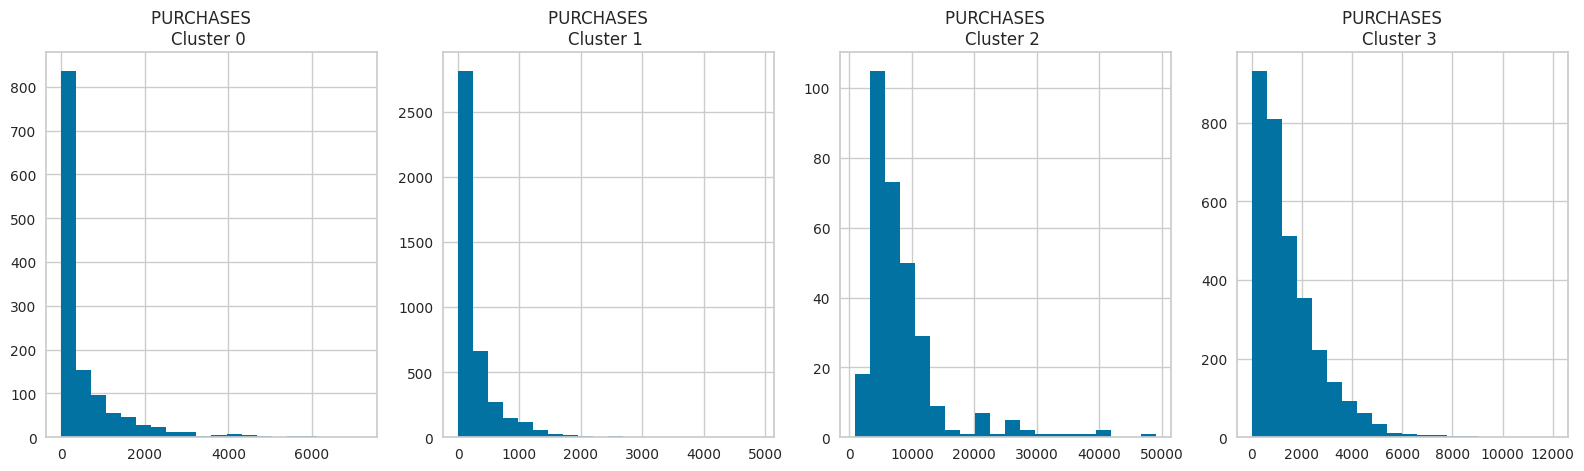

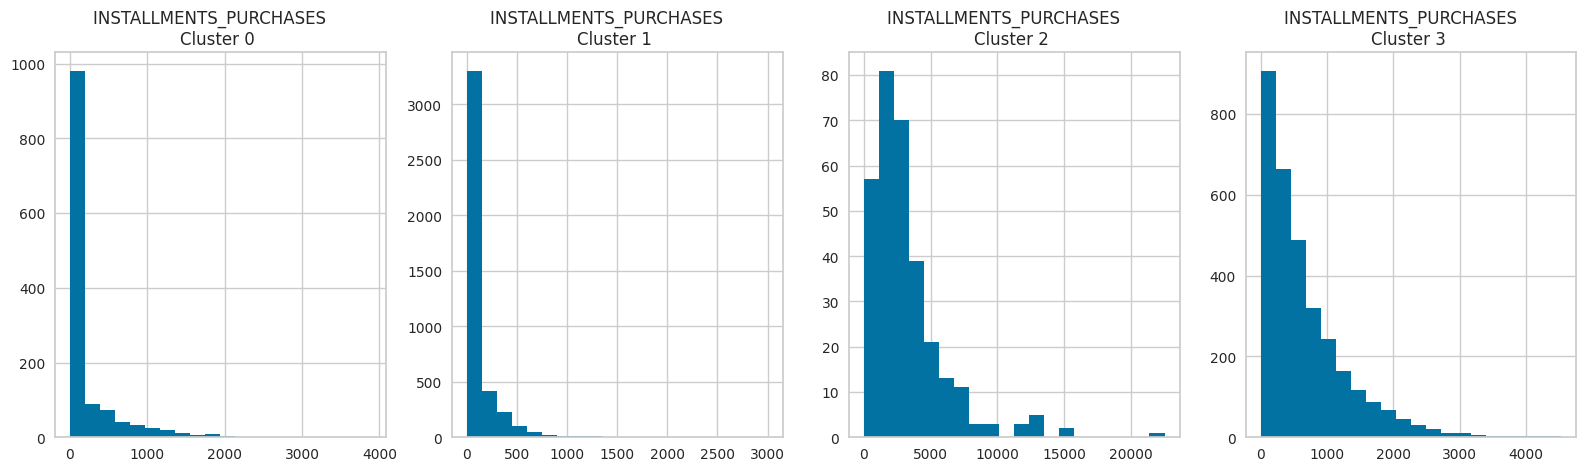

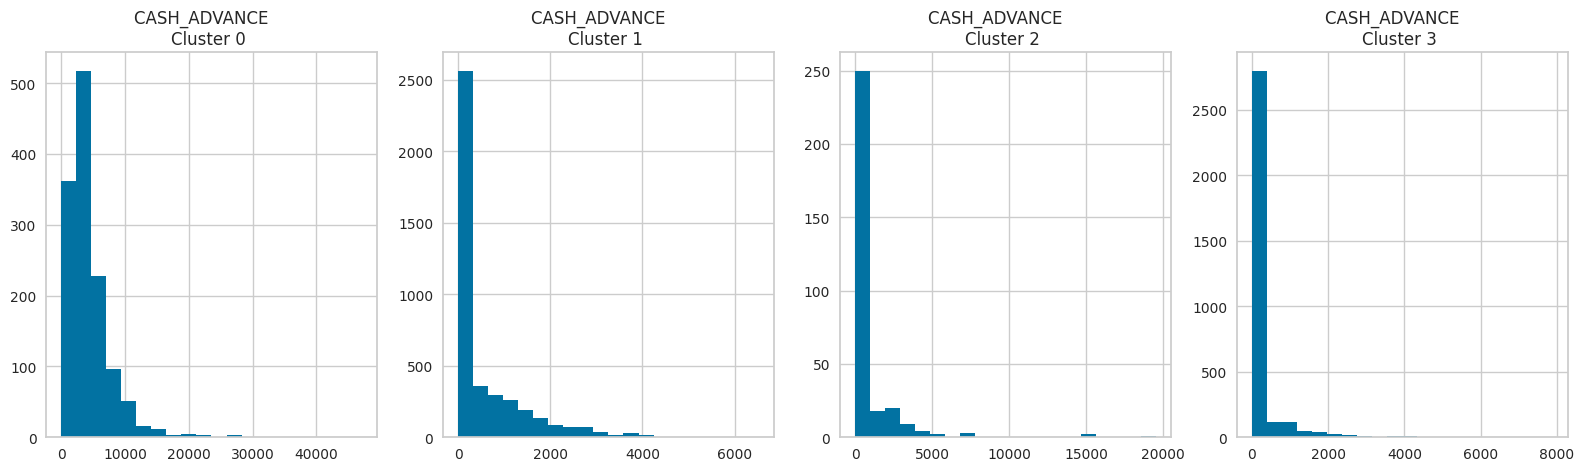

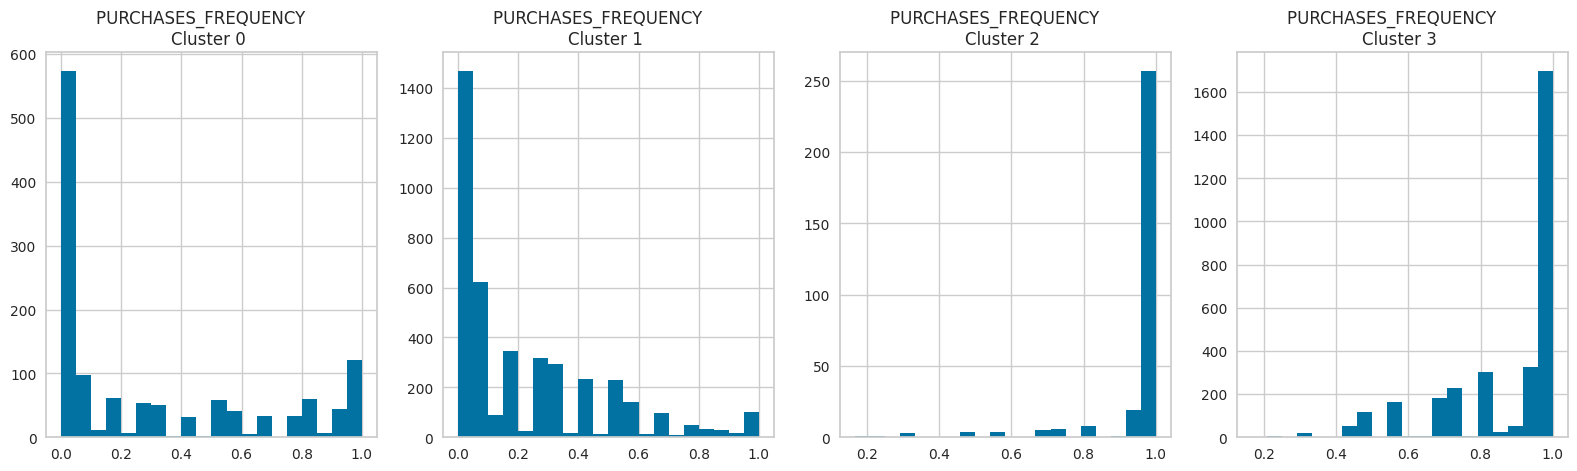

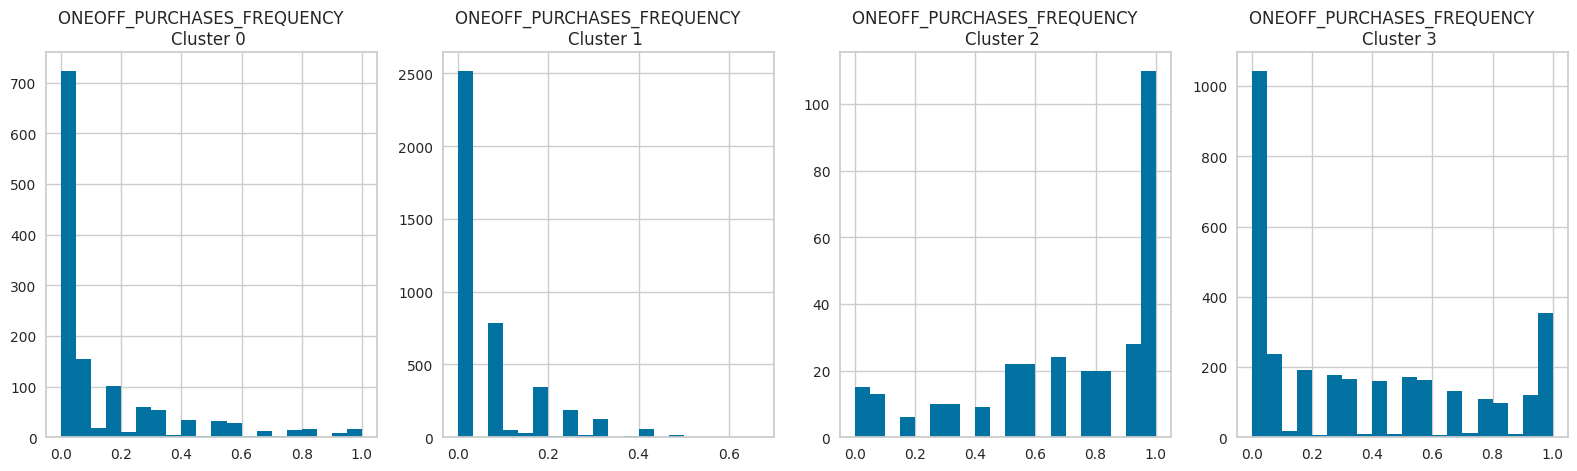

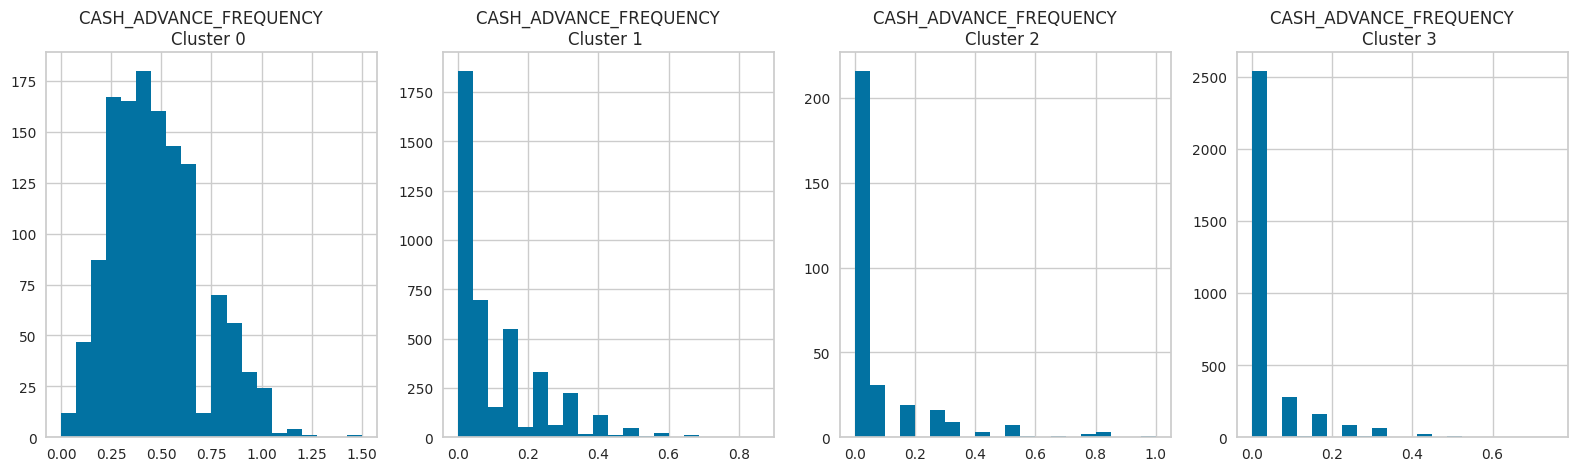

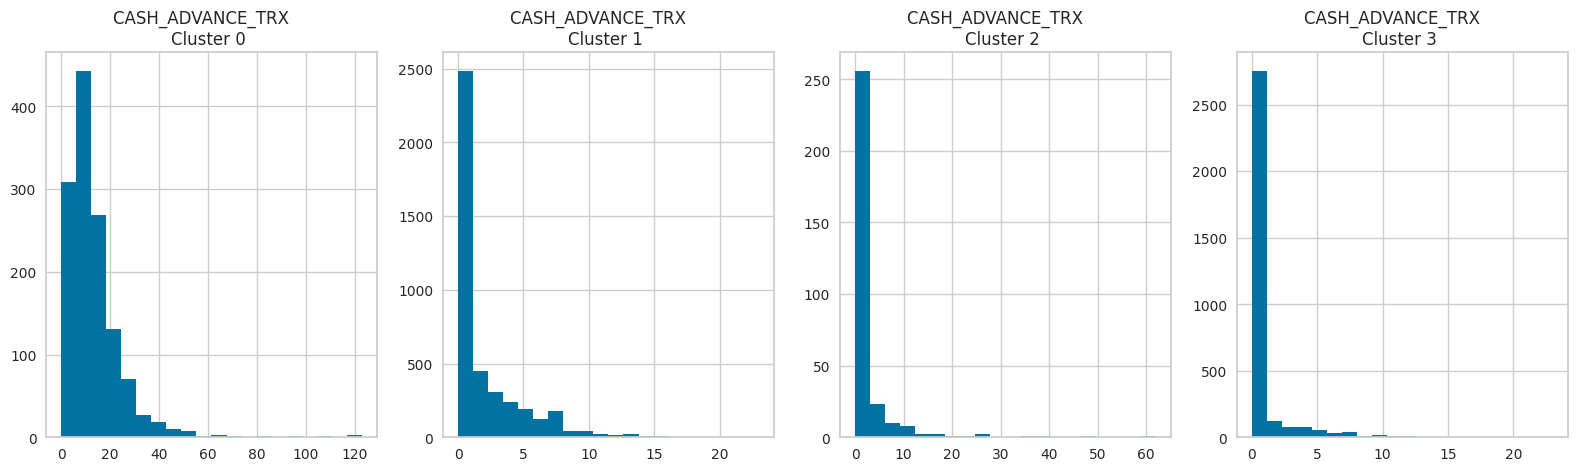

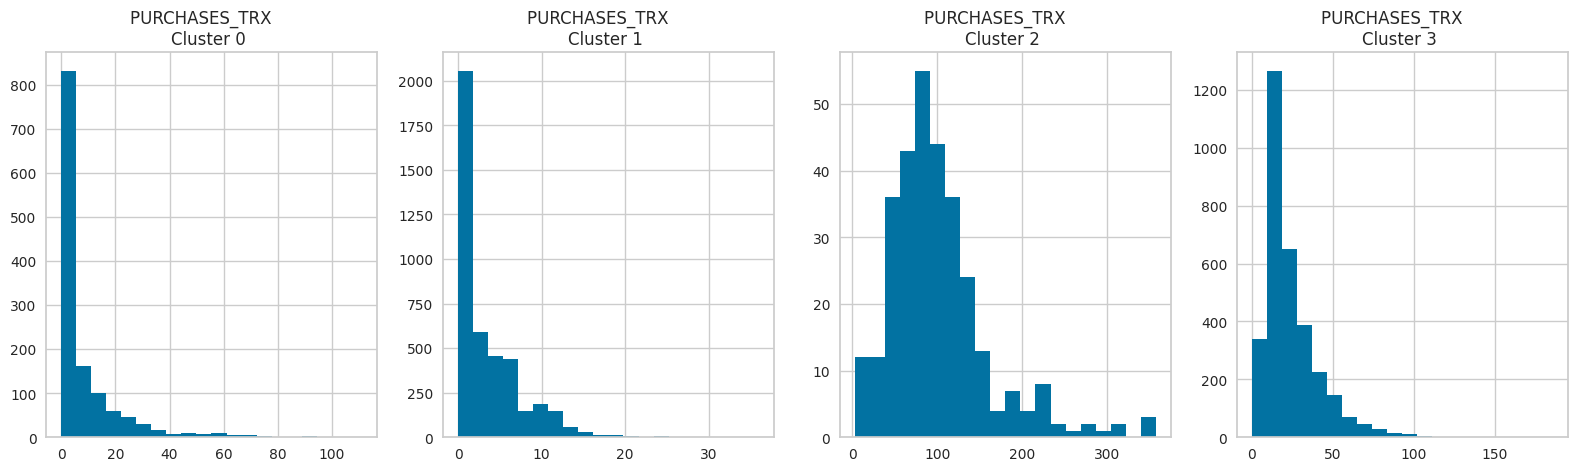

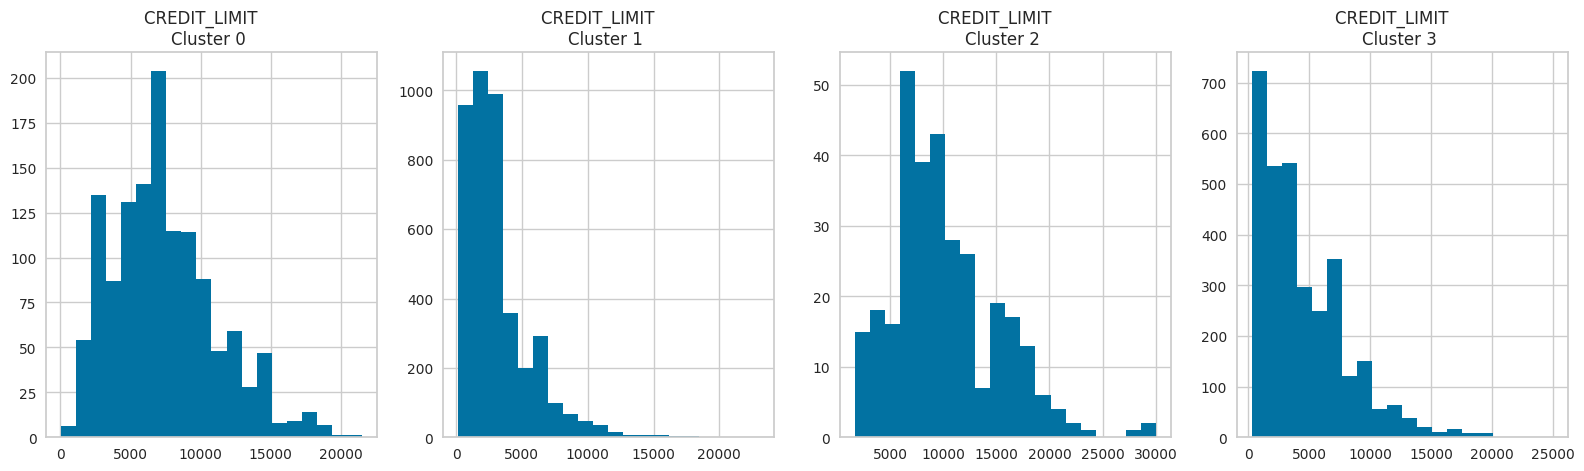

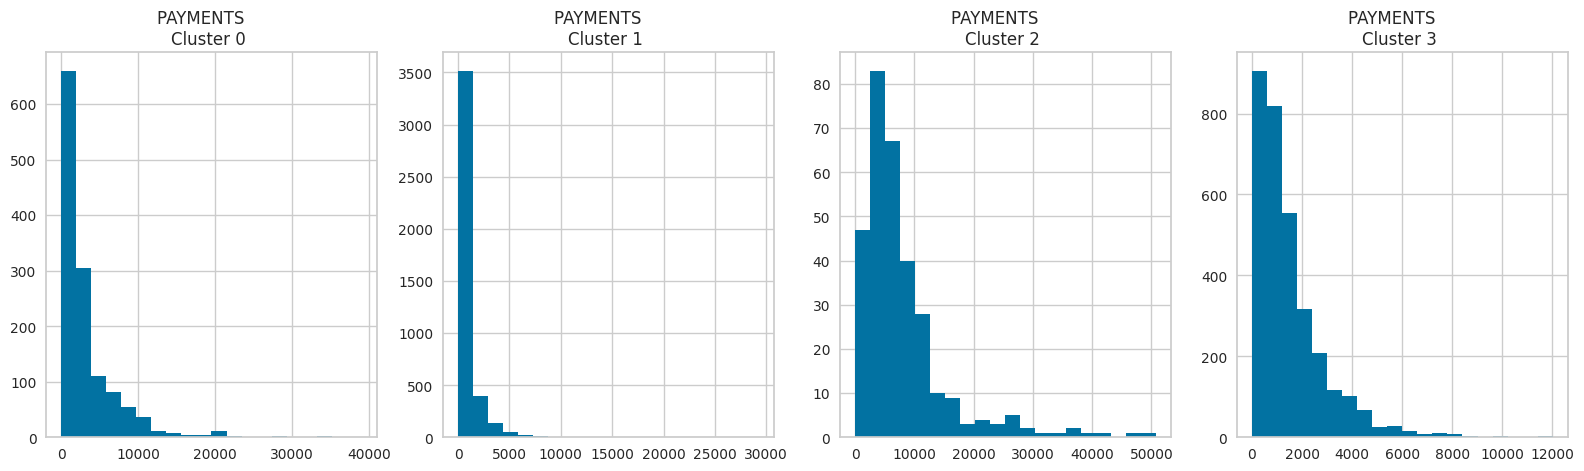

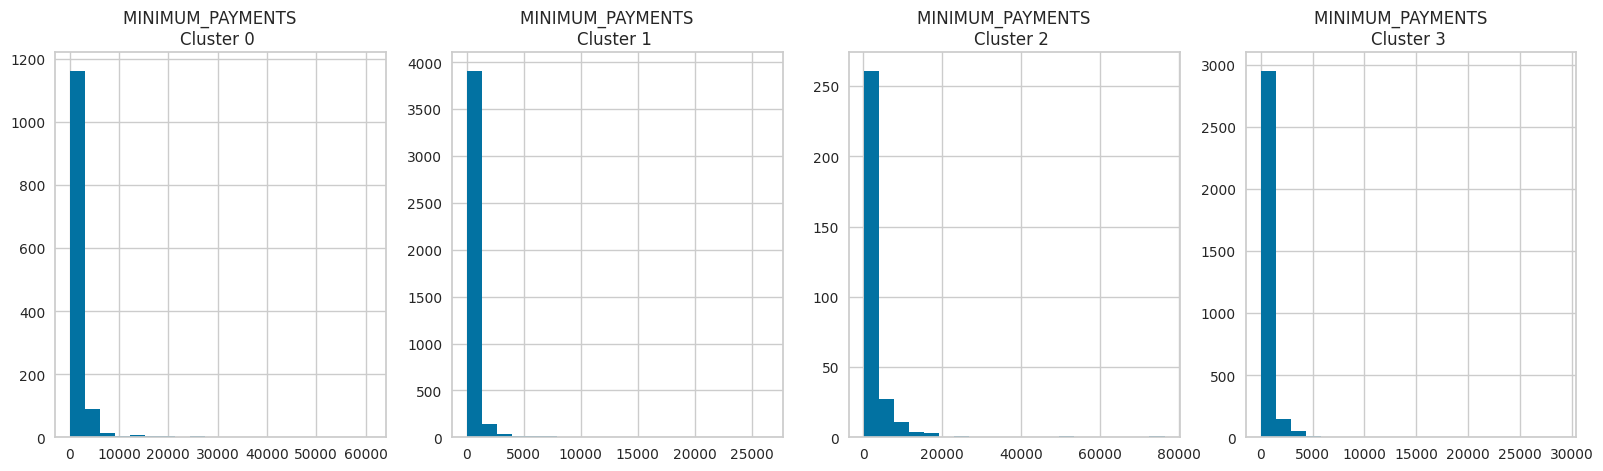

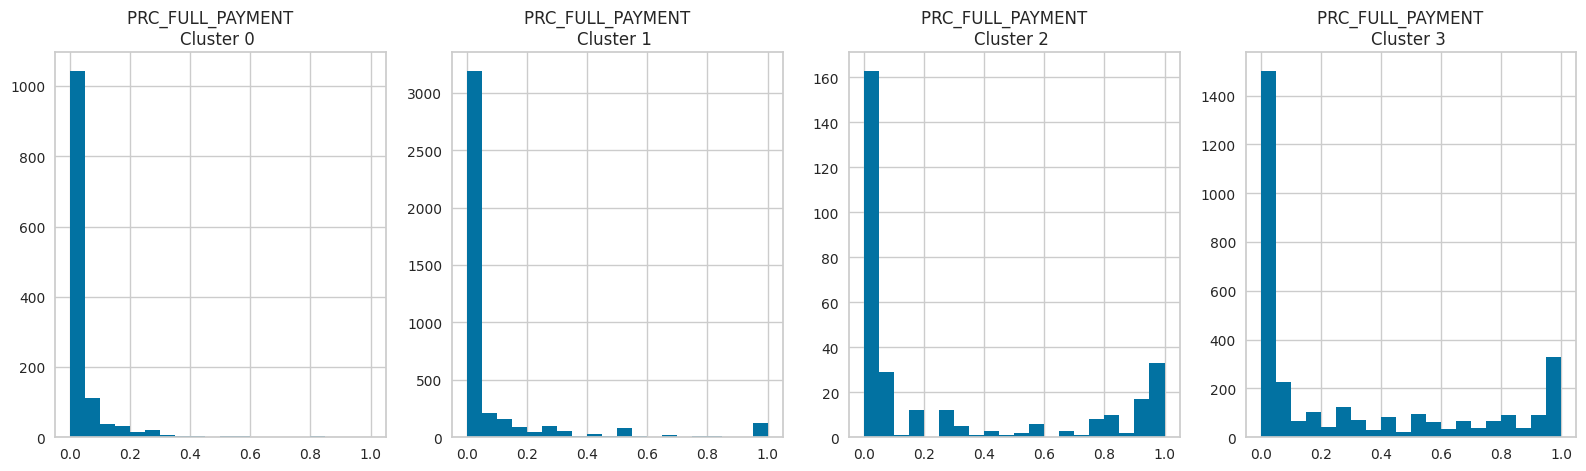

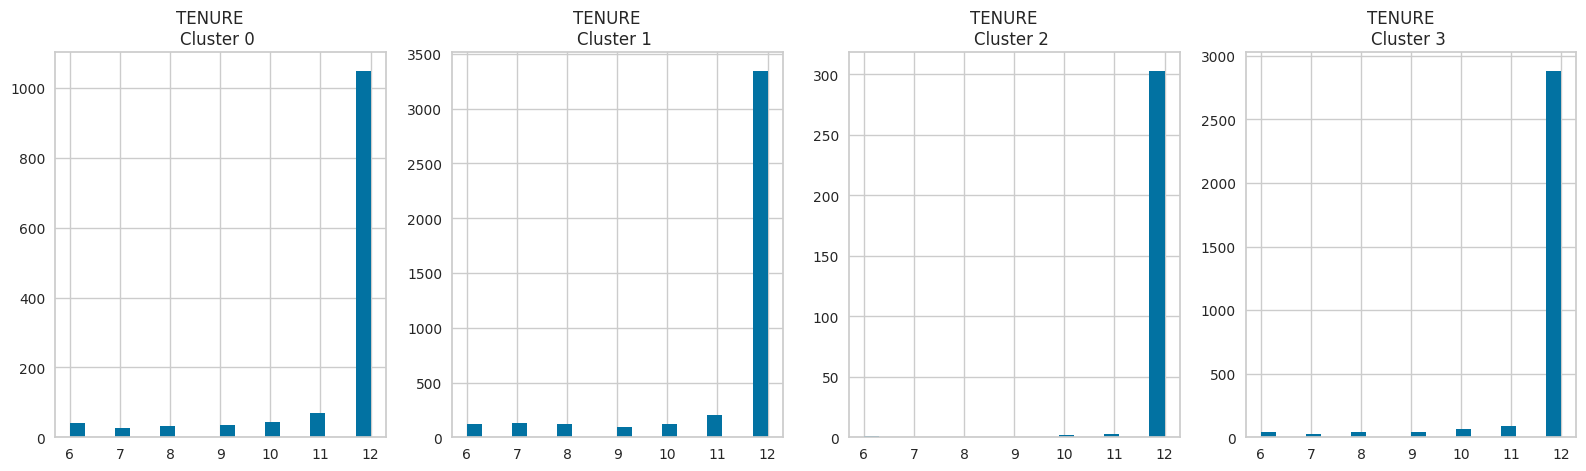

In [24]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(4):
    plt.subplot(1,7,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))

  plt.show()



**APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS**

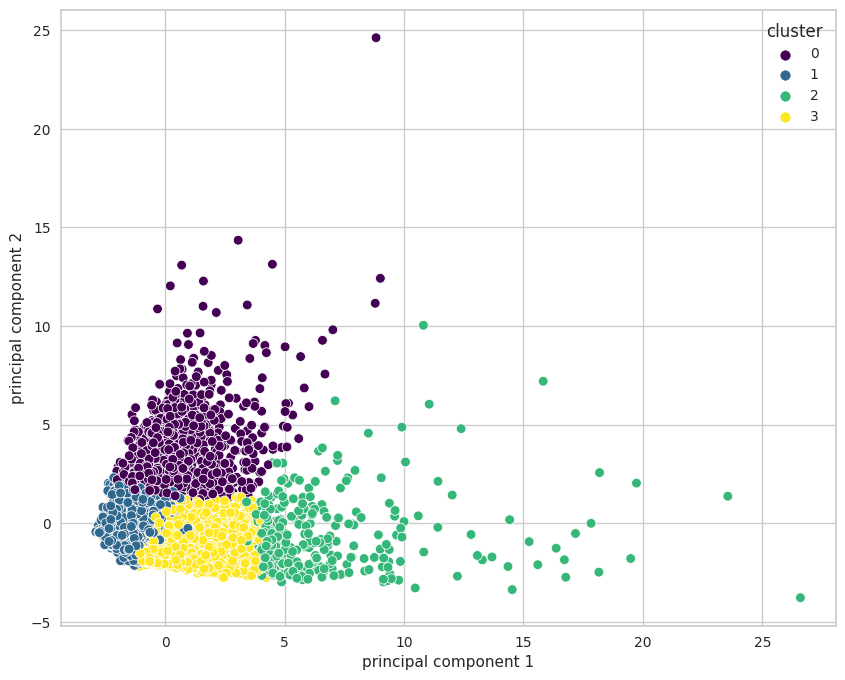

In [25]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(creditcard_df_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf['cluster'] = creditcard_df_cluster['cluster']
plt.figure(figsize=(10,8))
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', hue='cluster', palette='viridis')
plt.show()


Let's try another clustering model and compare the results

**Hierarchical Clustering (Agglomerative):**

In [26]:

from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hc_labels=hc.fit_predict(creditcard_df_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


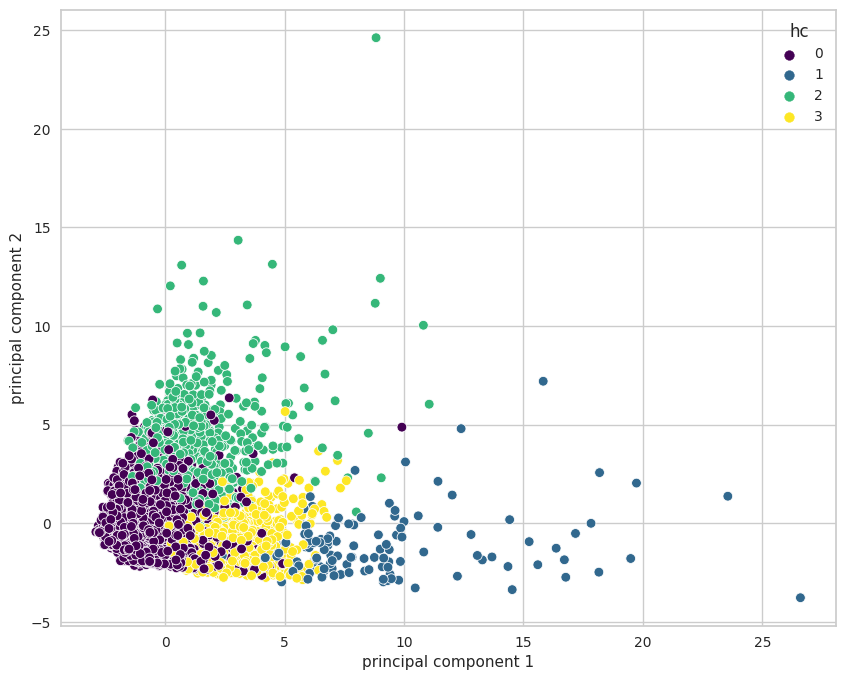

In [27]:

creditcard_df_hc = pd.concat([creditcard_df, pd.DataFrame({'hc':hc_labels})], axis = 1)
creditcard_df_hc.head()

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(creditcard_df_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf['hc'] = creditcard_df_hc['hc']
plt.figure(figsize=(10,8))
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', hue='hc', palette='viridis')
plt.show()


# EVALUATING THE MODELS:

In [28]:
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
print("Silhouette Score (KMeans): ", metrics.silhouette_score(creditcard_df_scaled, labels))
print("Calinski-Harabasz Index (KMeans): ", metrics.calinski_harabasz_score(creditcard_df_scaled, labels))
print("Davies-Bouldin Index (KMeans): ", metrics.davies_bouldin_score(creditcard_df_scaled, labels))

print("Davies-Bouldin Index (Hierarchical Clustering):", davies_bouldin_score(creditcard_df_scaled, hc.labels_))
print("Silhouette Score (Hierarchical Clustering):", silhouette_score(creditcard_df_scaled, hc.labels_))
print("Calinski-Harabasz Index (Hierarchical Clustering):", calinski_harabasz_score(creditcard_df_scaled, hc.labels_))


Silhouette Score (KMeans):  0.17524927003725216
Calinski-Harabasz Index (KMeans):  1522.1292183308283
Davies-Bouldin Index (KMeans):  1.6394597298974327
Davies-Bouldin Index (Hierarchical Clustering): 1.493007330000403
Silhouette Score (Hierarchical Clustering): 0.2148830713617026
Calinski-Harabasz Index (Hierarchical Clustering): 1174.2781319588212


### Overall Description of the Clusters (Kmeans) 

1. **Cluster 0**: Comprises 3192 entries
2. **Cluster 1**: Comprises 4149 entries
3. **Cluster 2**: Comprises 309 entries
4. **Cluster 3**: Comprises 1300 entries

Each cluster is characterized by distinct behaviors and patterns in credit card usage, including balance, purchases, cash advances, and payment habits.

### Cluster Descriptions

#### Cluster 0
- **Number of Entries**: 3192
- **Behavior**:
  - Moderate balance with regular purchases.
  - High balance frequency indicating frequent checking of balance.
  - Lower cash advances compared to other clusters.
  - High purchases frequency, often involving installment purchases.
  - Generally have higher credit limits.
  - Regular payments with notable minimum payments.
  - Low full payment percentage.

#### Cluster 1
- **Number of Entries**: 4149
- **Behavior**:
  - Lower balance compared to other clusters.
  - High balance frequency indicating regular balance checking.
  - Very low purchases, with very few installments.
  - Minimal or no cash advances.
  - Very low purchases frequency, suggesting infrequent use of credit for purchases.
  - Generally lower credit limits.
  - Irregular payments and often lower minimum payments.
  - Low or no full payment percentage, indicating that full balance is seldom paid off.

#### Cluster 2
- **Number of Entries**: 309
- **Behavior**:
  - High balance with very frequent purchases.
  - Extremely high balance frequency indicating daily or near-daily checking.
  - High one-off purchase frequency and large number of transactions.
  - No cash advances.
  - Generally have higher credit limits.
  - Regular and substantial payments with high minimum payments.
  - Low full payment percentage.

#### Cluster 3
- **Number of Entries**: 1300
- **Behavior**:
  - Very high cash advances compared to all other clusters.
  - Low balance frequency indicating infrequent checking of balance.
  - Minimal purchases and installment purchases.
  - Regular cash advance transactions.
  - Lower number of purchase transactions.
  - Generally have moderate credit limits.
  - Regular but often substantial payments with high minimum payments.
  - Moderate full payment percentage, indicating occasional full payment of the balance.

### Summary
- **Cluster 0**: Regular users with moderate usage and frequent payments.
- **Cluster 1**: Low usage, low balance users who rarely use credit for purchases.
- **Cluster 2**: High balance, frequent purchasers with regular and substantial payments.
- **Cluster 3**: High cash advance users with infrequent checking of balance and minimal purchases.


# **Conclusion:**
* If emphasizing silhouette score, suggesting better-defined clusters, Hierarchical Clustering might be preferred.
* If focusing on the Calinski-Harabasz Index, indicating cohesive and separated clusters, KMeans appears to perform slightly better.
* The Davies-Bouldin Index favors Hierarchical Clustering due to its lower value, indicating better cluster quality in terms of separation and compactness.